In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.ndimage import convolve1d
#%matplotlib inline
#%matplotlib notebook
#%matplotlib qt
import math as mt


def Simulate(d,lmb):
    def Function (d,lmb,x):
        f1= np.cos((np.pi*x**2)/(d*lmb))
        f2=np.sin((np.pi*x**2)/(d*lmb))
        return f1,f2

    a=-100    
    B=100
    H=0.02
    n=int((B-a)/H)
    print('Steps',n)
    func=[]
    B_=[]
    for j in range(n):
        a=-100
        b=a+(j+1)*H
        h=0.01
        steps=int((b-a)/h)
        #print(a,b,steps)
        af1,af2= Function(d ,lmb,a)
        bf1,bf2= Function(d ,lmb,b)
        cf1=[]
        cf2=[]
        B_.append(b)
        for i in range(1,steps-2):
            f1,f2= Function(d ,lmb,a+i*h)
            cf1.append(2*f1)
            cf2.append(2*f2)
        trp_meth_f1=(h/2)*(af1+bf1+np.sum(cf1))
        trp_meth_f2=(h/2)*(af2+bf2+np.sum(cf2))
        #print(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
        func.append(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
    return np.array(func),np.array(B_)
#func1,B1_=Simulate(338.4e3 ,0.413e-9)#/(4000*9)
#func,B_=Simulate(338.4e3 ,1.24e-9)
#func1=func1/3.5
#func=func/3.5


In [ ]:
###wavelength of photon energy

In [10]:
import numpy as np
import scipy.constants as const
#eng_ev=np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]) #0.1 to 100 kev
eng_ev=np.array([600,1000,1400,1800,2200,2600,3000,3400,3800,4200,4600,5000,5400,5800,6200,6600,7000,7400,7800,8200,8600,9000,9400,9800]) 
jul=eng_ev/6.242e18
lamb=const.c*const.h/jul
print(lamb/10**-9)
print(10e3)



[2.06656584 1.2399395  0.88567107 0.68885528 0.56360887 0.47689981
 0.41331317 0.36468809 0.32629987 0.29522369 0.26955207 0.2479879
 0.22961843 0.21378267 0.19999024 0.18786962 0.17713421 0.16755939
 0.1589666  0.15121213 0.14417901 0.13777106 0.13190846 0.12652444]
10000.0


In [13]:
func1,B1_=Simulate(3.384e8 ,1.24e-9)

Steps 10000


In [4]:
# 1-10 kev [1.2399395  0.61996975 0.41331317 0.30998488 0.2479879  0.20665658
# 0.17713421 0.15499244 0.13777106 0.12399395]

func1,B1_=Simulate(3.384e8 ,1.24e-9)
func2,B2_=Simulate(3.384e8 ,0.6199e-9)
func3,B3_=Simulate(3.384e8 ,0.4133e-9)
func4,B4_=Simulate(3.384e8 ,0.30998488e-9)
func5,B5_=Simulate(3.384e8 ,0.2479879e-9)
func6,B6_=Simulate(3.384e8 ,0.20665658e-9)
func7,B7_=Simulate(3.384e8 ,0.17713421e-9)
func8,B8_=Simulate(3.384e8 ,0.15499244e-9)
func9,B9_=Simulate(3.384e8 ,0.13777106e-9)
func10,B10_=Simulate(3.384e8 ,0.12399395e-9)

Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000


In [5]:
np.savetxt('lc_eng_data.csv',np.c_[B1_,func1,func2,func3,func4,func5,func6,func7,func8,func9,func10],delimiter=',',fmt='%s')

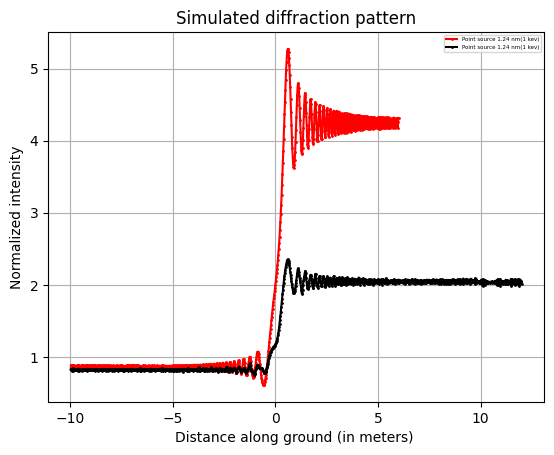

In [15]:
c_f=(func1+func2+func3+func4+func5+func6+func7+func8+func9+func10)/10
#
#print(len(func),len(B_))
#convolved_intensity = convolve1d(func, disc_intensity)/(7*80*size_d)#320
#convolved_band = convolve1d(c_f, disc_intensity)/(7*80*size_d)#320
plt.plot(B2_[4500:5300],func2[4500:5300]/3,color="red", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
plt.plot(B2_[4500:5600],c_f[4500:5600],color="black", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
#plt.plot(B_[4500:5500],convolved_intensity[4500:5500],color="blue", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
#plt.plot(B_[4500:5500],convolved_band[4500:5500],color="yellow", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
plt.grid(True)
plt.legend(loc='best',fontsize=4,frameon=True)
plt.xlabel('Distance along ground (in meters) ')
plt.ylabel('Normalized intensity')
plt.title('Simulated diffraction pattern')
plt.savefig('Convolved_plot.jpg',dpi=800)
plt.show()


In [11]:
#[2.06656584 1.2399395  0.88567107 0.68885528 0.56360887 0.47689981
#0.41331317 0.36468809 0.32629987 0.29522369 0.26955207 0.2479879
# 0.22961843 0.21378267 0.19999024 0.18786962 0.17713421 0.16755939
# 0.1589666  0.15121213 0.14417901 0.13777106 0.13190846 0.12652444]
func1,B1_=Simulate(3.384e8 ,2.06656584e-9)
func2,B2_=Simulate(3.384e8 ,1.2399395e-9)
func3,B3_=Simulate(3.384e8 ,0.88567107e-9)
func4,B4_=Simulate(3.384e8 ,0.68885528e-9)
func5,B5_=Simulate(3.384e8 ,0.56360887e-9)
func6,B6_=Simulate(3.384e8 ,0.47689981e-9)
func7,B7_=Simulate(3.384e8 ,0.41331317e-9)
func8,B8_=Simulate(3.384e8 ,0.36468809e-9)
func9,B9_=Simulate(3.384e8 ,0.32629987e-9)
func10,B10_=Simulate(3.384e8 ,0.29522369e-9)
func11,B11_=Simulate(3.384e8 ,0.26955207e-9)
func12,B12_=Simulate(3.384e8 ,0.2479879e-9)
func13,B13_=Simulate(3.384e8 ,0.22961843e-9)
func14,B14_=Simulate(3.384e8 ,0.21378267e-9)
func15,B15_=Simulate(3.384e8 ,0.19999024e-9)
func16,B16_=Simulate(3.384e8 ,0.18786962e-9)
func17,B17_=Simulate(3.384e8 ,0.17713421e-9)
func18,B18_=Simulate(3.384e8 ,0.16755939e-9)
func19,B19_=Simulate(3.384e8 ,0.1589666e-9)
func20,B20_=Simulate(3.384e8 ,0.15121213e-9)
func21,B21_=Simulate(3.384e8 ,0.14417901e-9)
func22,B22_=Simulate(3.384e8 ,0.13777106e-9)
func23,B23_=Simulate(3.384e8 ,0.13190846e-9)
func24,B24_=Simulate(3.384e8 ,0.12652444e-9)

Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000
Steps 10000


In [14]:
np.savetxt('lc_eng_data_0.4_bin.csv',np.c_[B1_,func1,func2,func3,func4,func5,func6,func7,func8,func9,func10,func10,func11,func12,func13,func14,func15,func16,func17,func18,func19,func20,func21,func22,func23,func24],delimiter=',',fmt='%s')

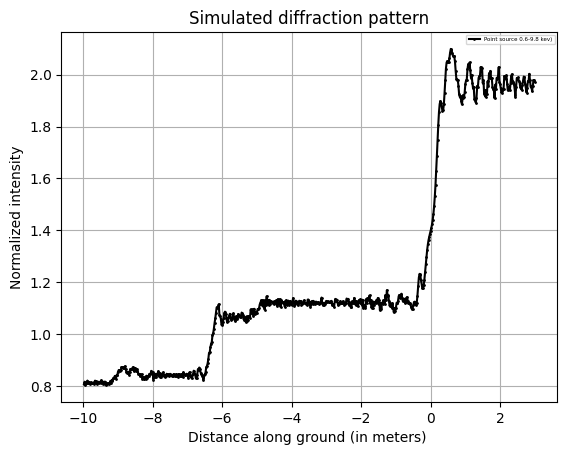

In [20]:
cf=(func1+func2+func3+func4+func5+func6+func7+func8+func9+func10+func10+func11+func12+func13+func14+func15+func16+func17+func18+func19+func20+func21+func22+func23+func24)/24
#plt.plot(B2_[4500:5300],func2[4500:5300]/3,color="red", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
plt.plot(B2_[4500:5150],cf[4500:5150],color="black", marker="o", linestyle="-",markersize=1,label='Point source 0.6-9.8 kev)')
#plt.plot(B_[4500:5500],convolved_intensity[4500:5500],color="blue", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
#plt.plot(B_[4500:5500],convolved_band[4500:5500],color="yellow", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
plt.grid(True)
plt.legend(loc='best',fontsize=4,frameon=True)
plt.xlabel('Distance along ground (in meters) ')
plt.ylabel('Normalized intensity')
plt.title('Simulated diffraction pattern')
plt.savefig('Convolved_plot.jpg',dpi=800)
plt.show()
